<a href="https://colab.research.google.com/github/eunseochu/YB_6th/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ch.2 사이킷런으로 시작하는 머신러닝**

#### **1) 사이킷런 소개와 특징**
파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- 쉽고 가장 파이썬스로운 API 제공
- 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공
- 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리

In [6]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import sklearn
print(sklearn.__version__)

1.0.2


#### **2) 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기**
붖꽃 데이터 세트로 붓꽃의 품종을 분류하는 머신러닝 모델 만들기
- 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종 예측

> **1. 분류(Classification)** </br>
대표적인 지도학습(Supervised learning) 방법 중 하나 <br/>
>
>
> **2. 지도학습**
-  학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에 미지의 레이블 예측
- 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 정답을 예측하는 방식
- **학습을 위해 주어진 데이터 세트를 학습 데이터 세트**, <br/>**머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트**로 지칭



> **사이킷런에서 사용할 모듈 임포트** <br/>
사이킷런 패키지 내 모듈명은 **sklearn**으로 시작하는 명명규칙 존재
- sklearn.datasets 내의 모듈: 사이킷런에서 자체적으로 제공하는 데이터세트를 새로 생성하는 모듈의 모임
- sklearn.tree 내 모듈: 트리 기반 ML 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection: 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 모듈
- **하이퍼 파라미터**: 머신러닝 알고리즘 별로 최적의 학습을 위해 직접 입력하는 파라미터로, 머신러닝 알고리즘의 성능 튜닝 가능

In [10]:
# 붓꽃 데이터 세트 생성
from sklearn.datasets import load_iris

# ML 알고리즘 - 의사 결정 트리 알고리즘
from sklearn.tree import DecisionTreeClassifier

# 데이터 세트를 학습과 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

> **붓꽃 데이터 세트** <br/>
load_iris() 함수를 이요해 로딩 후, 피처들과 데이터 값 구성 확인을 위해 DataFrame으로 변환
- 피처: sepal length, sepal width, petal length, petal width
- 레이블: 0, 1, 2 (0: Setosa 품종, 1: versicolor 품종, 2: virginica 품종)

In [11]:
import pandas as pd

# 데이터 세트 로딩
iris = load_iris()


# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:', iris_label)
print('irist target명:', iris.target_names)

# 붓꽃 데이터 세트를 DataFrame으로 변환
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
irist target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


> **학습용 데이터와 테스트용 데이터 분리: train_test_split()** <br/>
학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하기 위해 학습용 데이터와 테스트용 데이터 분리 <br/>
train_test_split() API를 통해 **test_size 파라미터 입력 값의 비율**로 쉽게 분할
- ex. test_size = 0.2: 전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%로 분할
- 첫 번째 파라미터 iris_data: 피처 데이터 세트
- 두 번째 파라미터 iris_label: 레이블 데이터 세트
- test_size = 전체 데이터 세트 중 테스트 데이터 세트의 비율
- random_state: 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위한 난수 발생 값

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

> **의사 결정 트리를 이용한 학습과 예측** <br/>
사이킷런 의사결정 트리 클래스인 DecisionTreeClassifier를 객체로 생성한 후, <br/>
**fit() 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출**하여 학습 수행
- 객체 생성 시 입력된 random_state는 동일한 학습/예측 결과를 출력하기 위한 용도

In [13]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

> **학습된 DecisionTreeClassifier 객체를 이용한 예측 수행** <br/>
**예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용**해야 하며, **일반적으로 테스트 데이터 세트** 이용
- predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면, 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값 반환

In [14]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

> **예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능 평가** <br/>
일반적으로 머신러닝 모델의 성능 평가 방법은 여러 가지가 있으나, 여기서는 정확도 측정
- 정확도: 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가하는 지표
- 사이킷런의 **accuracy_score()** 함수: <br/> 첫 번째 파라미터로 **실제 레이블 데이터 세트**, 두 번째 파라미터로 **예측 레이블 데이터 세트** 입력

In [16]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


> **분류 예측 프로세스 정리** <br/>
>
>**1.데이터 세트 분리**: 데이터를 학습 데이터와 테스트 데이터로 분리 <br/>
**2. 모델 학습**: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델 학습 <br/>
**3. 예측 수행**: 학습된 ML 모델을 이용해 테스트 데이터의 분류 (즉, 붓꽃 종류)를 예측 <br/>
**4. 평가**: 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능 평가

#### **3) 사이킷런의 기반 프레임워크 익히기**

> **Estimator 이해 (1) - fit(), predict() 메서드** <br/>
사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과 반환
- 사이킷런은 **ML 모델 학습을 위해 fit()을, 학습된 모델의 예측을 위해 predict() 메서드**를 제공
- **분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로** 지칭
- Classifier와 Regressor을 합쳐 **지도학습의 모든 알고리즘을 구현한 클래스를 통칭해 Estimator**라 지칭

> **Estimator 이해 (2)** <br/>
cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 **Estimator을 인자로** 받음 <br/>
- 함수 내에서 Estimator의 fit()과 predict()을 호출하여 평가하거나 하이퍼 파라미터 튜닝 수행

> **Estimator 이해 (3) - 비지도학습** <br/>
비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스 역시 fit()과 transform() 적용
- 비지도학습과 피처 추출에서 fit()은 입력 데이터의 형태를 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
- 이후 **입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()**으로 수행
- fit()과 transform()을 하나로 결합한 fit_transform()도 제공

> **사이킷런의 주요 모듈 정리** <br/>
>
> 머신러닝 모델 구축 주요 프로세스: 피처의 가공, 변경, 추출을 수행하는 피처 처리, ML 알고리즘 학습/예측 수행과 모델평가를 반복적으로 수행
- 머신러닝 모델을 구축하는 주요 프로세스를 지원하기 위해 매우 편리하고 다양하며 유연한 모듈 지원

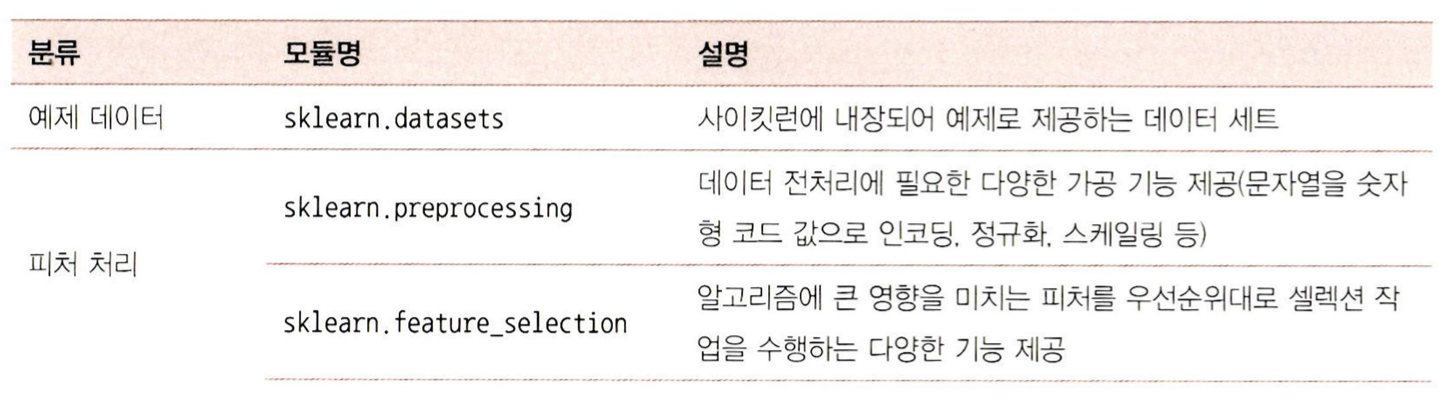

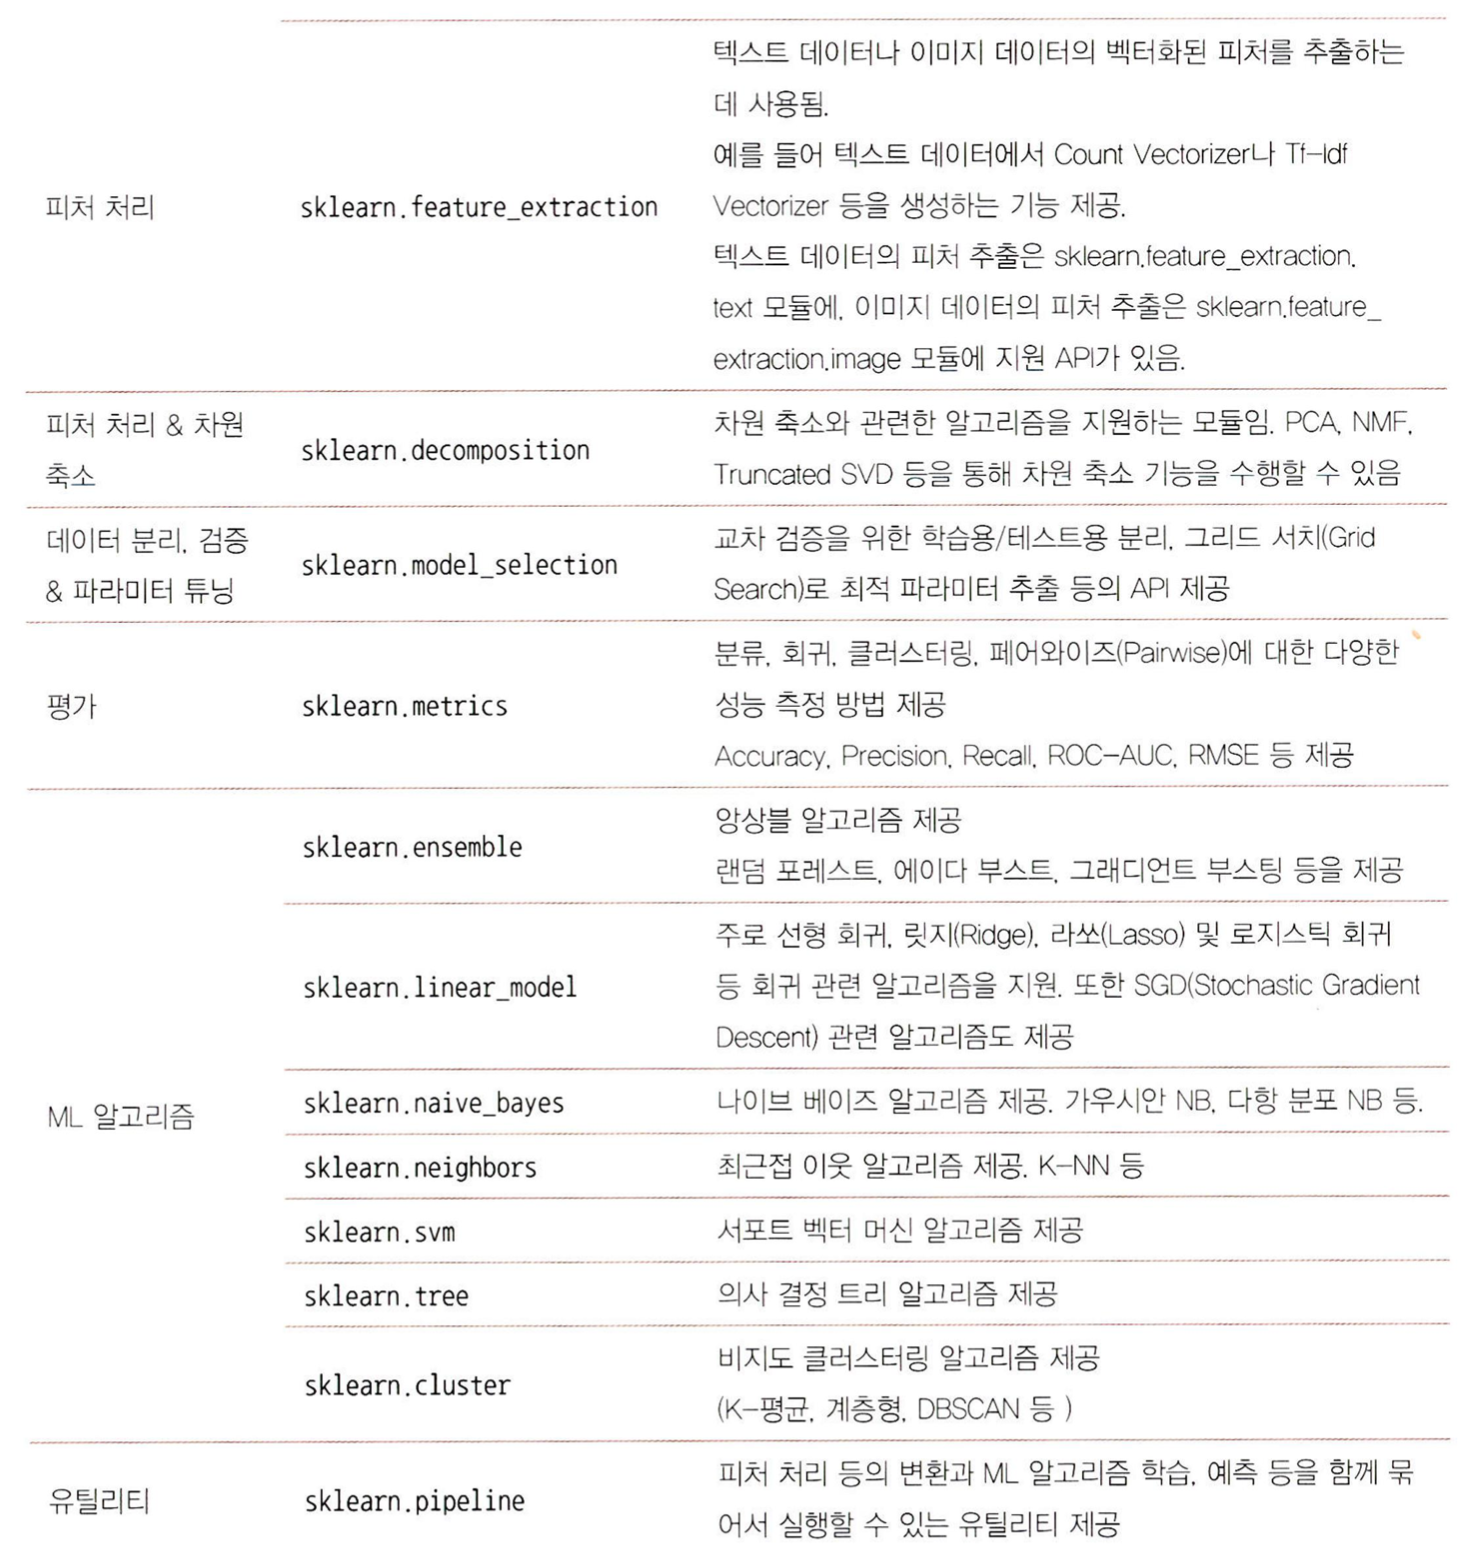

> **내장된 예제 데이터 세트** <br/>
별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용 가능한 간단한 데이터 세트 내장
- datasets 모듈에 있는 여러 API를 호출하여 만들 수 있음
- 분류나 회귀를 연습하기 위한 예제용도의 데이터 세트와, 분류와 클러스트링을 위해 표본 데이터로 생성할 수 있는 데이터 세트로 분리 <br/>
>
>  **1. 분류나 회귀 연습용 예제 데이터** <br/>
- datasets.load_boston( ): 회귀 용도 / 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
- datasets.load_breast_cancer( ): 분류 용도 / 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
- datasets.load_diabetes( ): 회귀 용도 / 당뇨 데이터 세트
- datasets.load_digits( ): 분류 용도 / 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
- datasets.load_iris( ): 분류 용도 / 붓꽃에 대한 피처를 가진 데이터 세트
>
> **2. 분류와 클러스터링을 위한 표본 데이터 생성기** <br/>
- datasets.make_classifications( ): 분류 용도 / 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터 무작위 생성
- datasets.make_blobs( ): 클러스터링 용도 / 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트 쉽게 생성

> **fetch 계열의 명령** <br/>
>
>데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고, <br/>
인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_Data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터 (인터넷 연결 필요)
- fetch_covtype( ): 회귀 분석용 토지 조사 자료
- fetch_20newsgroups( ): 뉴스 그룹 텍스트 자료
- fetch_olivetti_faces( ): 얼굴 이미지 자료
- fetch_lfw_people( ): 얼굴 이미지 자료
- fetch_lfw_pairs( ): 얼굴 이미지 자료
- fetch_rcv1( ): 로이터 뉴스 말뭉치
- fetch_mldata( ): ML 웹사이트에서 다운로드

> **분류나 회귀를 위한 연습용 예제 데이터 살펴보기** <br/>
사이킷런에 내장된 데이터 세트로, 일반적으로 딕셔너리 형태로 구성 <br/>
키는 보통 data, target, target_name, feature_names, DESCR로 구성
>
>  **1. 개별 키가 가리키는 데이터 세트의 의미** 
- data: 피처의 데이터 세트
- target: 분류 시 레이블 값, 회귀 시 숫자 결과값 데이터 세트 
- target_names: 개별 레이블의 이름 
- feature_names: 피처의 이름 
- DESCR: 데이터 세트에 대한 설명과 각 피처의 설명 <br/>
>
>  **2. 개별 키의 타입**
- data, target은 넘파이 배열(ndarry) 타입
- target_names, feature_names는 넘파이 배열 또는 파이썬 리스트(list) 타입
- DESCR은 스트링 타입

> **피처의 데이터 값 반환받기 (1)** <br/>
내장 데이터 세트 API를 호출한 뒤 그 Key 값을 지정
- load_iris() API 반환 결과는 sklearn.utils.Bunch 클래스 (Bunch: 파이썬 딕셔너리와 유사)
- 데이터 세트에 내장되어 있는 대부분의 데이터 세트는 딕셔너리 형태의 값 반환

In [22]:
# 1. 붓꽃 데이터 세트 생성
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


> **피처의 데이터 값 반환받기 (2)** <br/>
딕셔너리 형태이므로 Key 값을 확인 가능
- 데이터 키는 피처들의 데이터 값을 가리킴
- 'data', 'target', 'target_names', 'feature_names', 'DESCR'

In [23]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


> **피처의 데이터 값 반환받기 (3)** <br/>
데이터 세트가 딕셔너리 형태이므로, 피처 데이터 값을 추출하기 위해서는 **데이터 세트.data(또는 데이터 세트['data'])** 이용
- target, feature_names, DESCR key가 가리키는 데이터 값 추출도 동일하게 수행

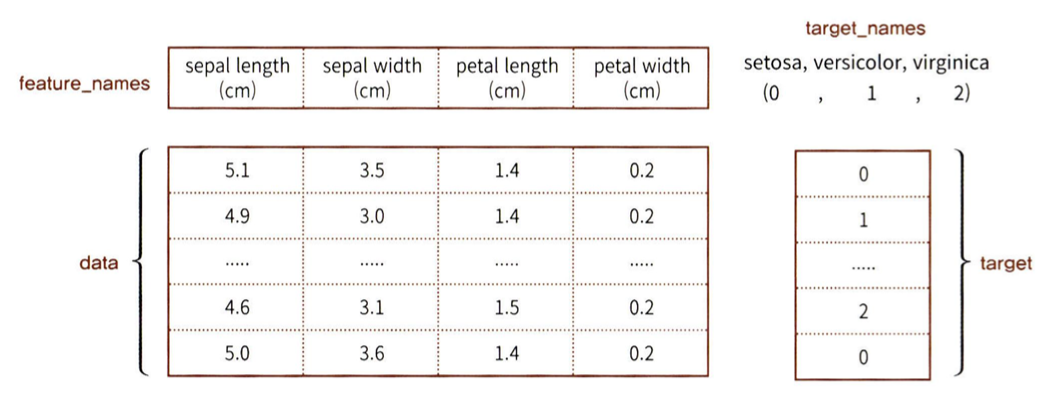

In [24]:
# load_iris()가 반환하는 객체의 키인 feature_names, target_names, data, target이 가리키는 값
print('\n feature_names 의 type:', type(iris_data.feature_names))
print(' feature_names 의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:', type(iris_data.target_names))
print(' target_names 의 shape:', len(iris_data.target_names))
print('iris_data.target_names')

print('\n data 의 type:', type(iris_data.data))
print(' data 의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:', type(iris_data.target))
print(' target 의 shape:', iris_data.target.shape)
print(iris_data.target)



 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 target_names 의 shape: 3
iris_data.target_names

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

#### **4) Model Selection 모듈 소개**
사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, <br/>
그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

> **학습/테스트 데이터 세트 분리 (1) - train_test_split()** <br/>
테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측할 경우, <br/>
이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문에 예측 결과가 100% 정확함
- **예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트**
- 사이킷런의 train_test_split()를 통해 원본 데이터 세트에서 학습 및 테스트 데이터 세트 쉽게 분리 가능

In [26]:
# 학습과 예측을 동일한 데이터 세트로 수행한 경우

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


> **학습/테스트 데이터 세트 분리 (2) - train_test_split()** <br/>
sklearn.model_selection 모듈에서 로드하여 첫 번째 파라미터로 **피처 데이터 세트**, 두 번째 파라미터로 **레이블 데이터 세트** 입력
- **test_size**: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인가 (default: 0.25 = 25%)
- **train_size**: 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인가 (주로 test_size만 사용)
- **shuffle**: 데이터 분리 전 데이터를 미리 섞을 지 결정하며, 데이터를 분산시켜 효율적인 학습 및 테스트 데이터 생성 (default: True)
- **random_state**: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값 
- train_test_split( )의 반환 값: **학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트** 반환 (튜플 형태)

In [29]:
# 붓꽃 데이터 세트를 테스트 데이터 세트를 전체의 30%로, 학습 데이터 세트를 70%로 분리

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)

In [31]:
# 학습 데이터 기반으로 DecisionTreeClassifier 학습 후 예측 정확도 측정

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


> **교차검증** <br/>
고정된 학습 데이터와 테스트 데이터로 평가 시 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델이 유도되므로 <br/> 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우 성능이 저하되는 문제 발생
- **과적합**: 모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 떨어지는 경우
- 특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습한다면 실제 데이터 양식과 차이가 발생해 성능 저하
- 이러한 데이터 편중을 막기 위해 **별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트로 학습과 평가 수행**
- 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화 더욱 쉽게 가능

> **ML 모델의 성능 평가** <br/>
교차 검증 기반으로 1차 평가 후 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스
- ML에 사용하는 **데이터 세트를 세분화하여 학습, 검증, 테스트 데이터 세트로 분리**
- **테스트 데이터 세트 외에 별도의 검증 데이터 세트**를 두어 최종 평가 이전에 학습된 모델을 다양하게 평가

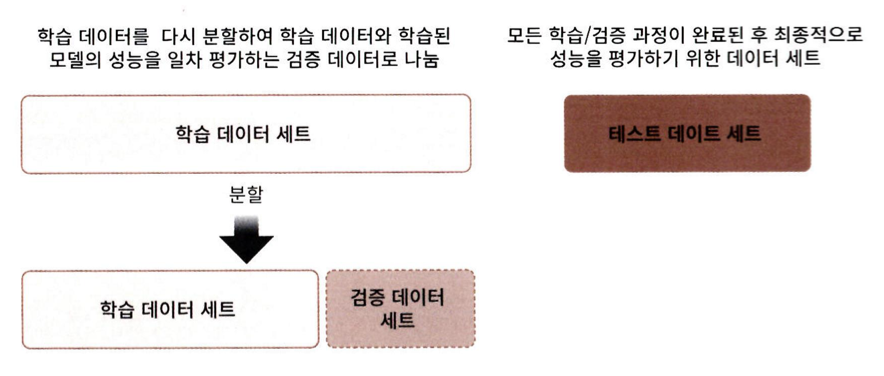

> **K 폴드 교차검증** <br/>
K개의 데이터 폴드 세트를 만들어서 **K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행**하는 방법 (가장 보편적으로 사용) <br/>
>
> ex. 5 폴드 교차 검증 <br/>
5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, <br/> 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가
- 데이터 세트를 K등분(5등분)
- 첫 번째 반복에서 1~4번을 학습 데이터 세트, 마지막 5번을 검증 데이터 세트로 설정하고 학습과 평가 수행
- 첫 번째 평가를 수행하고 나면 두 번째 반복에서 비슷한 작업을 수행
- 단, 이번에는 학습 데이터와 검증 데이터를 변경 (1~3번과 5번을 학습, 4번을 검증으로 설정)
- 이렇게 점진적으로 변경하면서 마지막 5번까지 학습과 검증을 수행한 후 이를 평균하여 K 폴드 평가 결과로 반영

In [33]:
# KFold 클래스를 이용해 붓꽃 데이터 세트 교차 검증 및 예측 정확도 확인

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [89]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트로 분할할 수 있는 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter +=1

  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

#2 교차 검증 정확도: 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

#3 교차 검증 정확도: 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.4090909090909091


> **Stratified K폴드** <br/>
**불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합**을 위한 K 폴드 방식
- 불균형한 분포도를 가진 레이블 데이터 집합: 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우쳐지는 것
- ex. 대출 사기 데이터 (대출 사기:1, 정상 대출:0): 대부분은 정상 대출이고 아주 작은 확률로 대출 사기 레이블이 존재하므로,<br/>
 K 폴드로 랜덤하게 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우
- **레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 데이터 세트에 제대로 분배하지 못하는 경우**의 문제 해결
- **원본 데이터의 레이블 분포를 고려**하여 이 분포와 동일하게 학습과 검증 데이터 세트 분배

In [90]:
import pandas as pd

# 레이블 값 0, 1, 2 모두 50개로 동일 (Setosa, Versicolor, Virginica)
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

> **교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값 분포도 확인** <br/>
3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출
- 학습 레이블이 1, 2밖에 없어 0은 학습하지 못하고, 검증 레이블이 0밖에 없어 학습 모델은 0을 예측하지 못함
- 검증 예측 정확도가 0이 됨

In [91]:
# 3개의 폴드 세트를 KFold로 생성하고 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도 확인

kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'. format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


> **StratifiedKFold를 통한 해결** <br/>
KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제 해결
- 레이블 데이터 분포도에 따라 데이터를 나누므로 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 **레이블 데이터 세트**도 필요
- 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로, <br/> 왜곡된 레이블 데이터 세트에서는 반드시 **Stratified K폴드**를 이용해 교차 검증
- 일반적으로 분류에서의 교차 검증은 K 폴드가 아닌 Stratified K 폴드로 분할되어야 함
- 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에, 결정값별로 분포를 정하는 의미가 없으므로 <br/> 회귀에서는 Stratified K 폴드가 지원되지 않음 

In [92]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'. format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts()) 

  ## 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [93]:
## StratifiedKFold를 이용한 데이터 분리 및 교차 검증

dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuarcy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  # 교차 검증별 정확도 및 평균 정확도 계산
  print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
  print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.]
## 평균 검증 정확도: 0.0

#2 교차 검증 정확도: 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0. 0.]
## 평균 검증 정확도: 0.0

#3 교차 검증 정확도: 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0. 0. 0.]
## 평균 검증 정확도: 0.0


> **교차 검증을 보다 간편하게 - cross_val_score()** <br/>
KFold로 폴드 세트를 설정하고, for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤, <br/> 반복적으로 학습과 예측을 수행한 후 예측 성능을 반환하는 일련의 과정을 한꺼번에 수행해주는 API
- cross_val_score()는 단 하나의 평가 지표만 가능하지만, **cross_validate()는 여러 개의 평가 지표를 반환**
- cross_validate()는 **학습 데이터에 대한 성능 평가 지표와 수행 시간**도 같이 제공
>
>```
># estimator, X, y, scoring, cv가 주요 파라미터
cross_val_score(estimator, X, y = None, scoring = None, cv = None, n_jobs = 1, verbose = 0, fit_params = None, pre_dispatch = '2*n_jobs')
```
- **estimator**: 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor
- **X**: 피처 데이터 세트, **y**: 레이블 데이터 세트, **scoring**: 예측 성능 평가 지표 기술, **cv**: 교차 검증 폴드 수
- cross_val_score() 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
- 일반적으로 **cross_val_score()의 배열 형태 반환 값을 평균하여 평가 수치로 사용**
- **classifier가 입력되면 Stratified K 폴드 방식**으로 레이블값의 분포에 따라 학습/테스트 데이터 분할 <br/>
(회귀인 경우 Stratified K 폴드 방식으로 분할 불가하므로 K 폴드 방식으로 분할)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: 0.9667


> **GridSearchCV (1) - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에** <br/>
하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능 개선 가능 <br/>
- GridSearchCV API를 이용해 Classifier나 Regressor 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서, <br/> 편리하게 최적의 파라미터를 도출할 수 있는 방안 제공 (촘촘하게 파라미터를 입력하며 테스트 하는 방식)

In [48]:
# 최고 성능을 가지는 파라미터 조합을 찾기 위해, 파라미터 집합을 만들고 순차적으로 적용하며 최적화 수행

grid_parameters = {'max_depth': [1, 2, 3],
                   'min_samples_split': [2, 3]
                   }

> **GridSearchCV (2) - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에** <br/>
GridSearchCV는 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줌 <br/>
- **데이터 세트를 cross_validation을 위한 학습/테스트 세트로 자동 분할** 후, <br/> 하이퍼 파라미터 그리드에 기술된 **모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 함**
- 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸림
- ex. CV가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평균값으로 성능을 측정하므로, <br/>6개의 파라미터 조합이라면 총 CV 3회 X 6개 파라미터 조합 = 18회의 학습/평가

> **GridSearchCV (3) - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에** <br/>
GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터는 다음과 같음
- **estimator**: classifier, regressor, pipeline 사용 가능
- **param_grid**: key + 리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정
- **scoring**: 예측 성능을 측정할 평가 방법 지정. 보통은 사이킷런의 성능평가 지표(ex. 'accuracy')를 지정하는 문자열로 지정하나, <br/> 별도의 성능 평가 지표 함수도 지정 가능
- **cv**: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
- **refit**: 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 (default: True)

In [49]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 121)
dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정: 하이퍼 파라미터의 명칭은 문자열 Key, 하이퍼 파라미터의 값은 리스트 형으로
parameters = {'max_depth': [1,2,3], 'min_samples_split': [2,3]}

In [51]:
import pandas

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 결정
### refit = True가 default, True면 가장 좋은 파라미터 설정으로 재학습
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

# 학습 데이터 세트를 GridSearchCV 객체의 fit 메서드에 인자로 입력하여 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


> **cv_results_의 주요 칼럼별 의미 정리** <br/>
- **params**: 수행할 때마다 적용된 개별 하이퍼 파라미터 값
- **rank_test_score**: 하이퍼 파라미터별로 성능이 좋은 score의 순위 (1이 최적의 하이퍼 파라미터)
- **mean_test_score**: 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

> **최적 하이퍼 파라미터의 값과 그때의 정확도** <br/>
GridSearchCV 객체의 fit() 수행 시 최고 성능을 나타낸 하이퍼 파라미터 값과 그때의 평가 결과 값이 <br/> 각각 best_params_, best_score_ 속성에 기록 (cv_results_의 rank_test_score가 1일 때 값)

In [54]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


> **이미 학습된 best_estimator_를 이용해 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측 및 성능 평가** <br/>
>
>GridSearchCV 객체의 생성 파라미터로 refit=True가 디폴트이며,<br/>
이 경우 GridSearchCV가 **최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장**

In [55]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트의 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트의 정확도: 0.9667


# **5) 데이터 전처리**
ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지는지에 따라 결과가 달라질 수 있음 (Garbage In, Garbage out) <br/>
특히 **결손값, 즉 NaN, Null 값은 허용되지 않으므로 고정된 다른 값으로 변환 필요**
- 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체
- Null 값이 대부분이라면 해당 피처는 드롭하는 것을 권장
- Null 값이 일정 수준 이상 되는 경우, 해당 피처가 중요도가 높은 피처이며 피처의 평균값으로 대체할 경우 예측 왜곡이 발생할 수 있다면, <br/> 업무로직 등을 상세히 검토해 더 정밀한 대체 값 선정 필요

> **데이터 인코딩** <br/>
머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않기 때문에, 모든 문자열 값은 인코딩 되어 **숫자 형**으로 변환 필요 <br/>
문자열 피처는 일반적으로 **카테고리형 피처와 텍스트형 피처**를 의미
- 카테고리형 피처: 코드 값으로 표현
- 텍스트형 피처: 피처 벡터화 등의 기법으로 벡터화하거나 불필요한 피처인 경우 삭제
- 주민 번호 등 식별자 피처는 예측에 중요한 요소가 아니므로 오히려 알고리즘을 복잡하게 만들고 예측 성능을 떨어뜨리기 때문 <br/>

> **레이블 인코딩 (1)** <br/>
머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩과 원-핫 인코딩이 존재
- 카테고리 피처를 코드형 숫자 값으로 변환 (ex. TV: 1, 냉장고: 2, 전자레인지: 3)
- '01', '02'와 같은 코드 값 역시 문자열이므로 1, 2와 같은 숫자형 값으로 변환
- LabelEncoder 클래스로 구현하여 LabelEnconder를 객체로 생성한 후 fit()과 transfomr()을 호출 해 수행

In [56]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder로 객체를 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [57]:
# 데이터가 많은 경우 classes_ 속성 값을 통해 확인
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [59]:
# inverse_transform()을 통해 인코딩된 값 다시 디코딩
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


> **레이블 인코딩 (2)** <br/>
레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환하지만, <br/>
일괄적인 숫자 값으로 변환 되면서 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우 발생
- 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문에 가중치가 부여되거나 더 중요하게 인식될 가능성 발생
- 그러나, 단순 코드이지 숫자 값에 따른 순서나 중요도로 인식되어서는 안됨
- 따라서, 레이블 인코딩은 **선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야** 함 <br/>
(트리 계열의 ML 알고리즘은 이러한 특성이 반영되지 않으므로 레이블 인코딩 사용 가능)

> **원-핫 인코딩 (1)** <br/>
피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식으로, <br/>
숫자에 가중치가 부여되는 레이블 인코딩의 문제점을 해결하기 위해 등장한 방식 <br/>
(원-핫: 여러 개의 속성 중 단 한 개의 속성만 1로 표시)
- 행 형태의 피처의 교유 값을 열 형태로 차원을 변환한 뒤, **고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시** <br/>
ex. 해당 레코드의 상품 분류가 냉장고라면 상품 분류_냉장고 피처에만 1을 입력하고 나머지 피처는 모두 0
- OneHotEncoder 클래스로 변환이 가능하나, 주의할 점이 두 가지 존재 <br/>
>
>   1. OneHotEncoder로 변환하기 전 모든 문자열 값이 **숫자형 값으로 변환** 되어야 함 <br/>
>   2. 입력 값으로 **2차원 데이터**가 필요


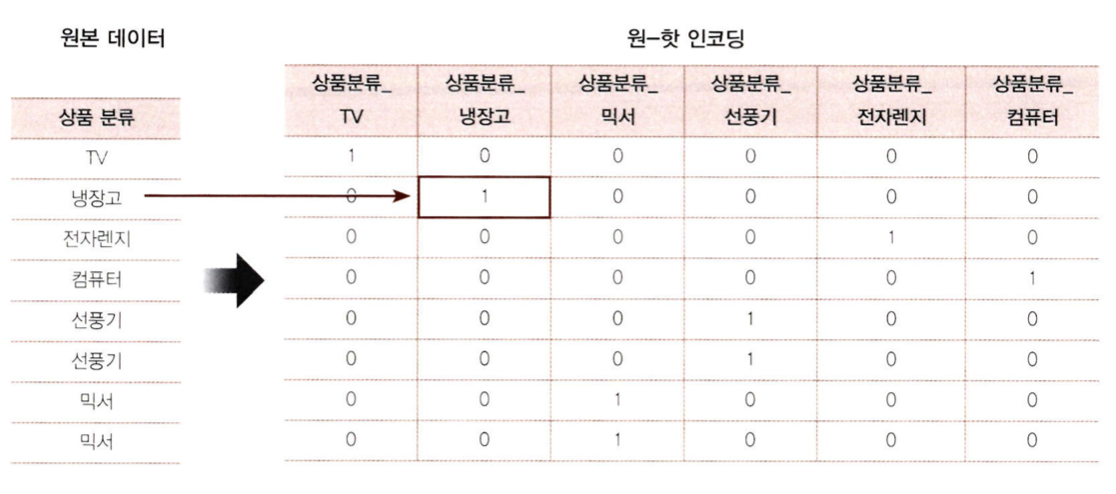

In [62]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape) # 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


> **원-핫 인코딩(2): get_dummies()** <br/>
사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환해주는 판다스 API

In [66]:
import pandas
df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


> **피처 스케일링과 정규화** <br/>
서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라 부르며, <br/> 대표적인 방법으로는 표준화(Standardization)와 정규화(Normalization) 존재 <br/>
>
> 1. 표준화
- 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
- xi_new: 원래 값에서 피처 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값 <br/>
>
> 2. 정규화
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환 
- 개별 데이터의 크기를 모두 똑같은 단위로 변경
- ex. 거리를 나타내는 피처 A와 금액을 나타내는 피처 B를 모두 최소 0 ~ 최대 1의 값으로 변환
- xi_new: 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값으로 변환
- 그러나, **사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화에는 차이 존재**

> **사이킷런의 Normalizer 모듈** <br/>
선형대수에서의 정규화 개념이 적용되었으며, 개별 벡터의 크기를 맞추기 위해 변환 <br/>
즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠줌
- xi_new: 원래 값에서 세 개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠 줌
- 혼선 방지를 위해 일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭하고, 선형대수 개념의 정규화를 벡터 정규화로 지칭

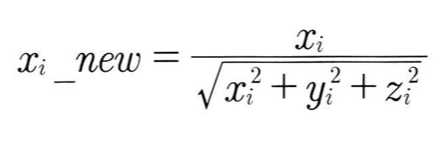

> **StandardScaler** <br/>
개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해주는 클래스 (표준화 지원)
- 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 매우 중요
- 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine)이나 선형 회귀(Linear Regression), <br/> 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었기 때문에 <br/> 사전에 표준화를 적용하는 것이 예측 성능 향상에 중요한 요소

In [67]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feautre 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feautre 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [69]:
# StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환: fit()과 transform() 메서드에 변환 대상 피처 데이터 세트 입력 및 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform( )시 스케일 변환 된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


> **MinMaxScaler** <br/>
데이터값을 0과 1 사이의 범위 값으로 변환
- 음수 값의 경우 -1에서 1 값으로 변환
- 데이터 분포가 가우시안 분포가 아닌 경우 Min, Max Scale 적용

In [71]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScale 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 numPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


> **학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점** <br/>
StandardScaler나 MixMaxScaler와 같은 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용
- fit(): 데이터 변환을 위한 기준 정보 설정(데이터 세트의 최댓값/최솟값 설정 등)
- transform(): 설정된 정보를 이용해 데이터 변환
- fit_transform(): fit()과 transform()을 한번에 적용하는 기능 수행 <br/>
>
> Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면, <br/> 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환 적용
- 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용
- 테스트 데이터로 새로운 스케일링 기준 정보를 만들 경우 학습과 테스트 데이터의 스케일링 기준 정보가 달라져 올바른 예측 결과 X

In [75]:
## 테스트 데이터에 fit() 적용 시 생기는 문제점 

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [76]:
## 학습 데이터인 train_array부터 MinMaxScaler를 이용해 변환

# MinMaxSCaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [81]:
## 테스트 데이터 변환 시 fit()을 호출 해 스케일링 기준 정보를 다시 적용한 뒤 transform() 수행

# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 train_array 데이터::', np.round(test_scaled.reshape(-1), 2))

### 학습 데이터와 테스트 데이터의 스케일링이 맞지 않으므로, 서로 다른 원본값이 동일한 값으로 변환되는 결과 초래
### 테스트 데이터에 다시 fit()을 적용해서는 안되며, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 train_array 데이터:: [0.  0.2 0.4 0.6 0.8 1. ]


In [83]:
## fit()을 호출하지 않고 학습 데이터로 fit()을 수행한 MinMaxScaler 객체의 transform()을 이용해 데이터 변환

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n 원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

 원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


> **학습 데이터와 테스트 데이터의 fit(), transform(), fit_transform()을 이용해 스케일링 변환 시 유의점 정리** <br/>
- 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
- 여의치 않다면, 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 <br/>학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환
- 앞으로 배울 사이킷런 기반의 PCA와 같은 차원 축소 변환이나 텍스트의 피처 벡터화 변환 작업 시에도 동일하게 적용